# **GSS Project**
## Research Question
What is the relationship between socioeconomic status and mental health?
## Summary
We wanted to investigate the relationship between Americans' overall happiness and socioeconomic status. This research is done with the data gathered by the NORC General Social Survey. The GSS uses a multistage sampling process, however, it is still subject to sampling bias as people who may be harder to contact may be underrepresented. Additionally, by nature of being a survey, the GSS is also subject to nonresponse bias.

To measure mental health, we focused on two variables: self-reported happiness levels and frequency of depressive feelings. By investigating both trends with happiness and depression, we will be directly observing both positive and negative trends in mental health. Both of these are self-reported by individual respondents. To measure socioeconomic status, we focused on the recorded socioeconomic index variable and occupational prestige of individuals from the survey. The GSS calculates the socioeconomic index by weighting and factoring in income, education, occupation, and wealth as indicators. The GSS also calculates occupational prestige by having respondents rank jobs and calculate an average score on how prestigious people view them. These prestige scores are then corroborated with existing measures such as the International Standard Classification of Occupations (ISCO) or the Duncan Socioeconomic Index (SEI). We graphed the distribution of each variable as well as the relationships between the variables using the packages listed below.

Overall, we noticed as individuals had a higher socioeconomic index or occupational prestige, there was a positive correlation with self-reported happiness levels. We also observed that as a socioeconomic index or occupational prestige decreased, there was an increase in the frequency of depressive feelings. We hypothesize that this was due to financial troubles causing additional stress for people with a lower socioeconomic status. Specifically, it was more likely for people with a lower socioeconomic status to have more common depressive thoughts whereas people with a higher socioeconomic status had more infrequent depressive thoughts. We also found that for people in the highest percentile of socioeconomic status, depression seemed to increase. This may be due to special outliers of high-stress high prestige jobs. People in the lowest percentile of socioeconomic status had a major increase in the frequency of recurring depressive thoughts.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# The file 'GSS.csv', which contains all the data for all our variables, was created using the MyGSS tool in GSS Data Explorer which allowed us to
# extract the specific variables we chose to focus on and place it in one csv
df = pd.read_csv('GSS.csv', low_memory=False)
print(df.shape)
df.head()

(72390, 23)


,year,id_,wrkstat,hrs2,wrkslf,industry,occ10,age,educ,happy,...,ballot,prestg10,sei10,hlthdep,hlthconf,hlthnot,feelnerv,worry,feeldown,nointerest
0,1972,1,Working full time,.i: Inapplicable,Someone else,Department and mail order establishments,"Wholesale and retail buyers, except farm products",23,16,Not too happy,...,.i: Inapplicable,45,50.0,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,Retired,.i: Inapplicable,Someone else,Newspaper publishing and printing,First-line supervisors of production and opera...,70,10,Not too happy,...,.i: Inapplicable,50,46.5,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,Working part time,.i: Inapplicable,Someone else,"Real estate, incl. real estate-insurance-law o...",Real estate brokers and sales agents,48,12,Pretty happy,...,.i: Inapplicable,49,56.9,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,Working full time,.i: Inapplicable,Someone else,Apparel and accessories,Accountants and auditors,27,17,Not too happy,...,.i: Inapplicable,60,76.3,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,Keeping house,.i: Inapplicable,Someone else,Telephone (wire and radio),Telephone operators,61,12,Pretty happy,...,.i: Inapplicable,31,31.9,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [ ]:
print("Column names:", df.columns.tolist())

Column names: ['year', 'id_', 'wrkstat', 'hrs2', 'wrkslf', 'industry', 'occ10', 'age', 'educ', 'happy', 'satjob', 'satfin', 'trauma5', 'ballot', 'prestg10', 'sei10', 'hlthdep', 'hlthconf', 'hlthnot', 'feelnerv', 'worry', 'feeldown', 'nointerest']


## Results
### Overview of Variables
To measure socioeconomic status we used the socioeconomic index and occupational prestige variables. meanwhile, to measure mental health we used the happiness level and depression level variables.

#### Socioeconomic Index

In [ ]:
var = 'sei10'
print(df[var].unique(),'\n')

[  50.    46.5   56.9   76.3   31.9   62.    36.2   32.    13.6   12.6
   12.4   29.5   39.9   36.4   41.1   82.5 -100.    59.1   60.4   38.8
   80.9   14.8   39.7   38.1   21.    28.4   27.7   84.2   50.4   32.7
   84.5   24.6   74.6   28.7   19.7   23.    31.1   42.8   20.8   25.
   35.8   18.6   14.    26.8   13.2   52.4   38.3   35.1   29.2   19.6
   37.3   19.2   81.9   87.6   65.3   24.2   39.1   69.3   43.    26.2
   23.2   25.2   60.1   24.1   62.6   20.7   22.9   62.7   53.5   45.4
   48.8   48.1   31.    45.3   39.6   80.7   77.4   21.6   23.3   27.
   71.6   72.7   76.7   75.5   52.    43.8   37.6   58.4   15.8   27.2
   21.8   73.9   68.    29.7    9.    92.1   50.3   34.1   59.8   67.7
   65.1   18.8   31.6   25.1   23.7   48.3   73.6   49.6   62.4   35.2
   22.4   86.5   57.1   17.5   37.7   24.    57.8   67.8   20.9   11.8
   46.    34.7   27.5   53.8   23.8   41.    21.4   41.8   46.6   26.1
   31.2   32.6   28.6   35.3   58.1   65.2   12.7   26.5   52.1   81.6
   37.2 

In [ ]:
# Looking at the data we see that entries where there is no applicable answer for socioeconomic index have a value of -100. We cleaned this to instead
# be represented by NaNs
df[var] = df[var].replace(-100., np.nan)
df[var] = pd.to_numeric(df[var], errors='coerce')
print(df[var].unique(),'\n')

[50.  46.5 56.9 76.3 31.9 62.  36.2 32.  13.6 12.6 12.4 29.5 39.9 36.4
 41.1 82.5  nan 59.1 60.4 38.8 80.9 14.8 39.7 38.1 21.  28.4 27.7 84.2
 50.4 32.7 84.5 24.6 74.6 28.7 19.7 23.  31.1 42.8 20.8 25.  35.8 18.6
 14.  26.8 13.2 52.4 38.3 35.1 29.2 19.6 37.3 19.2 81.9 87.6 65.3 24.2
 39.1 69.3 43.  26.2 23.2 25.2 60.1 24.1 62.6 20.7 22.9 62.7 53.5 45.4
 48.8 48.1 31.  45.3 39.6 80.7 77.4 21.6 23.3 27.  71.6 72.7 76.7 75.5
 52.  43.8 37.6 58.4 15.8 27.2 21.8 73.9 68.  29.7  9.  92.1 50.3 34.1
 59.8 67.7 65.1 18.8 31.6 25.1 23.7 48.3 73.6 49.6 62.4 35.2 22.4 86.5
 57.1 17.5 37.7 24.  57.8 67.8 20.9 11.8 46.  34.7 27.5 53.8 23.8 41.
 21.4 41.8 46.6 26.1 31.2 32.6 28.6 35.3 58.1 65.2 12.7 26.5 52.1 81.6
 37.2 66.4 31.5 20.5 83.8 14.4 54.6 81.  14.6 89.9 47.9 38.2 22.1 49.4
 42.9 57.4 85.2 60.5 20.3 25.7 62.9 36.5 44.9 63.7 20.  28.3 10.6 77.2
 53.6 17.1 91.9 56.8 71.7 71.  91.1 64.9 61.4 27.1 26.6 29.9 70.3 69.4
 39.2 87.9 37.4 73.4 64.2 40.1 45.  89.3 30.3 19.  33.7 31.3 13.3 37.
 84.  61

In [ ]:
df[var].describe()

count    67248.000000
mean        44.613145
std         22.081810
min          9.000000
25%         25.700000
50%         38.800000
75%         62.000000
max         93.700000
Name: sei10, dtype: float64

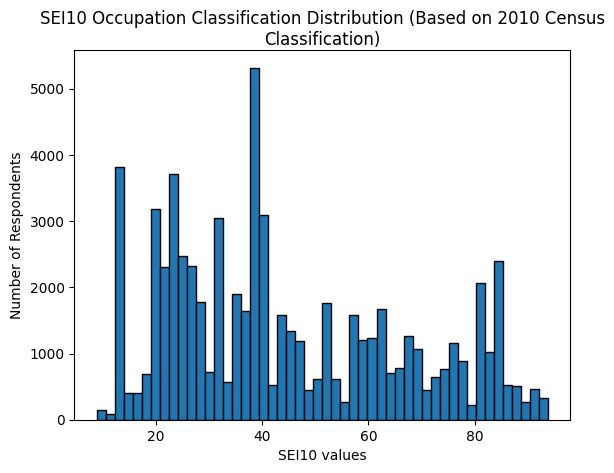

In [ ]:
df['sei10'].hist(grid=False, edgecolor='Black', bins=50)

plt.title('SEI10 Occupation Classification Distribution (Based on 2010 Census Classification)', wrap=True)

plt.xlabel('SEI10 values')
plt.ylabel('Number of Respondents')

plt.show()

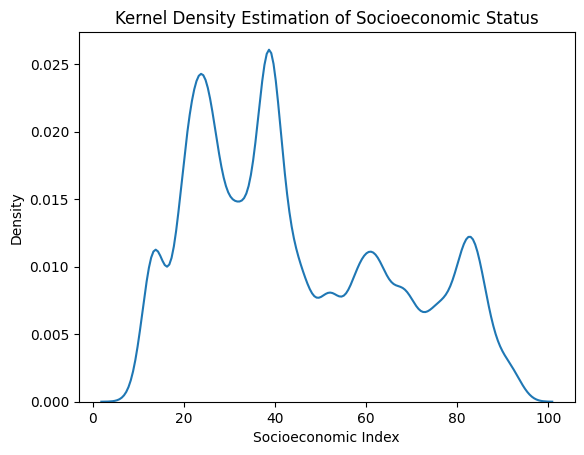

In [ ]:
sns.kdeplot(x='sei10', data=df).set(xlabel='Socioeconomic Index')

plt.title('Kernel Density Estimation of Socioeconomic Index', wrap=True)

plt.show()

From the histogram and density curve, the distribution of socioecoomic index is mostly congregated around the 20-40 index level. There are clear peaks around the 20 mark and the 40 mark and then smaller peaks around 60 and 80. This is overall consistent with the mean and median being around 44.613145 and 38 resepctively. The standard deviation is somewhat large at 22.081810 units meaning there is a lot of variation between the survey participants and their socioeconomic indexes. The overall distribution is right skewed meaning most survey participants were middle-to-lower socioeconomic status. There doesn't seem to be any outliers with the data.

#### Occupational Prestige

In [ ]:
# Occupational Prestige, while numeric, contains strings for when entries did not contain a value. To clean this, we first replaced the string used
# to denote an inapplicable response with NaNs then converted the type of the column to numeric
df['prestg10'] = df['prestg10'].replace('.i: Inapplicable', np.nan)
df['prestg10'] = pd.to_numeric(df['prestg10'], errors='coerce')

df['prestg10'].describe()

count    67248.000000
mean        43.288455
std         13.081734
min         16.000000
25%         33.000000
50%         43.000000
75%         50.000000
max         80.000000
Name: prestg10, dtype: float64

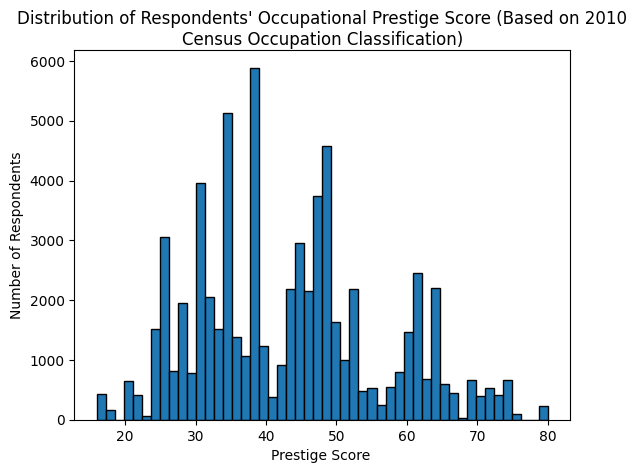

In [ ]:
df['prestg10'].hist(grid=False, edgecolor='Black', bins=50)

plt.title('Distribution of Respondents\' Occupational Prestige Score (Based on 2010 Census Occupation Classification)', wrap=True)

plt.xlabel('Prestige Score ')
plt.ylabel('Number of Respondents')

plt.show()

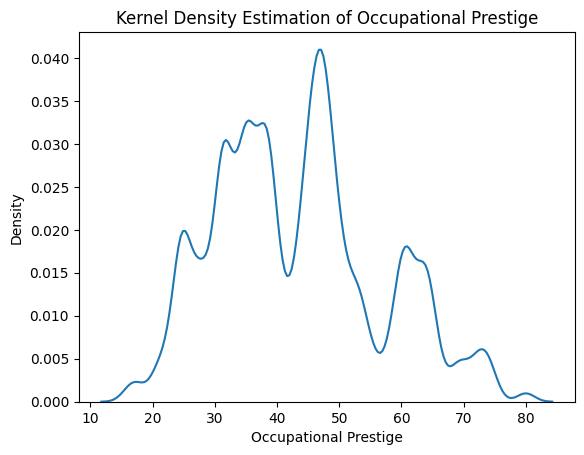

In [ ]:
sns.kdeplot(x='prestg10', data=df).set(xlabel='Occupational Prestige')

plt.title('Kernel Density Estimation of Occupational Prestige', wrap=True)

plt.show()

Occupational prestige largely centered around the 30-50 levels with peaks at around the 25 mark, 30-40 mark, 50 mark, and 60 mark. Overall, the density curve and histogram presents a normal bell curve with no outliers. The mean, 43.288455, and median, 43, are once again consistent with these observations and the standard deviation of 13.081734 also represent there is less variation between the respondants' occupational rpestige. This shows that most of the participants had occupations with medium-level of prestige.

[Text(0.5, 1.0, 'Socioeconomic Status vs Occupational Prestige'),
 Text(0.5, 0, 'Socioeconomic Index'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

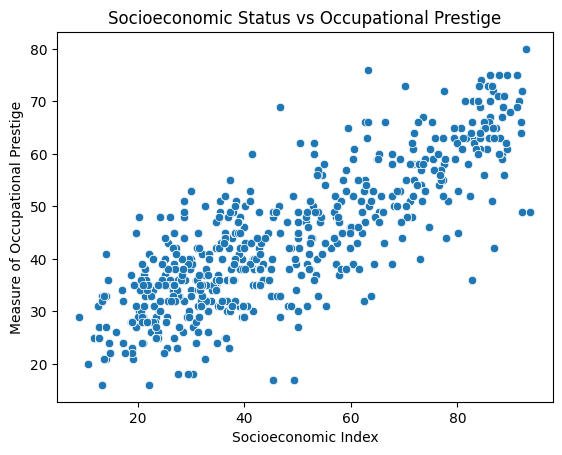

In [ ]:
# Having already cleaned both variables and converted them to numeric types, we investigated the relationship between the two major variables we believed
# to be indicative of status that we plan to use when comparing to mental health
sns.scatterplot(x=df['sei10'],y=df['prestg10']).set(title="Socioeconomic Status vs Occupational Prestige",xlabel='Socioeconomic Index',ylabel='Measure of Occupational Prestige')

There is a strong, positive correlation between socioeconomic index and occupational prestige. The survey participants with a higher socioeconomic status usually had occupations with higher prestige.

#### Happiness Level

In [ ]:
var = 'happy'
print(df[var].unique(),'\n')

['Not too happy' 'Pretty happy' 'Very happy' '.n:  No answer'
 '.d:  Do not Know/Cannot Choose' '.i:  Inapplicable'
 '.s:  Skipped on Web'] 



In [ ]:
# Cleaning the Happinss variable, we see notice that there were only three major categories of significance "Not too happy", "Pretty Happy",
# and "Very Happy" so we removed the redundent, unusable categories with NaNs
df[var] = df[var].replace('.i:  Inapplicable', np.nan)
df[var] = df[var].replace('.n:  No answer', np.nan)
df[var] = df[var].replace('.s:  Skipped on Web', np.nan)
df[var] = df[var].replace('.d:  Do not Know/Cannot Choose', np.nan)
print(df[var].unique(),'\n')

['Not too happy' 'Pretty happy' 'Very happy' nan] 



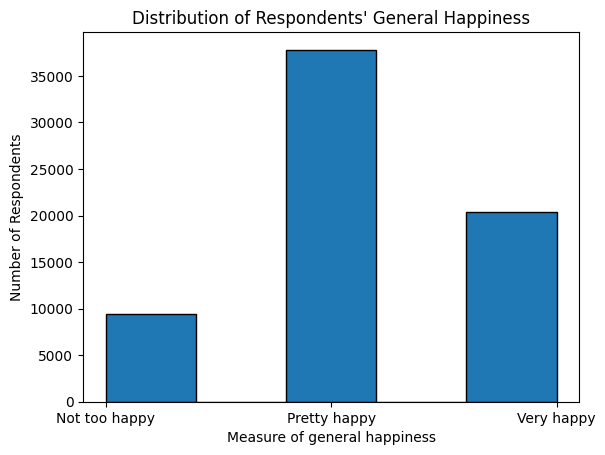

In [ ]:
df['happy'].hist(bins=5, grid=False, edgecolor='Black')

plt.title('Distribution of Respondents\' General Happiness')

plt.xlabel('Measure of general happiness')
plt.ylabel('Number of Respondents')

plt.show()


From the bar graph, we can see most participants are at the pretty happy level with over 35,000 responses. Less participants are at the very happy level with around 21,500 responses and then the least amount of participants were at the not too happy level with around 10,000 responses. Overall, the data doesn't seem to have any outliers. From both the depression levels and happiness level bar charts, it seems that most participants have a pretty medium to high level of mental health.

#### Depression Level

In [ ]:
var = 'hlthdep'
print(df[var].unique(),'\n')

['.i:  Inapplicable' 'Often' 'Seldom' 'Never' 'Sometimes'
 '.s:  Skipped on Web' 'Very often' '.d:  Do not Know/Cannot Choose'
 '.n:  No answer'] 



In [ ]:
# Depression Level was categorized very similarly to Happiness so we again removed the data that was not usable replacing it with NaNs
df[var] = df[var].replace('.i:  Inapplicable', np.nan)
df[var] = df[var].replace('.n:  No answer', np.nan)
df[var] = df[var].replace('.s:  Skipped on Web', np.nan)
df[var] = df[var].replace('.d:  Do not Know/Cannot Choose', np.nan)
print(df[var].unique(),'\n')

[nan 'Often' 'Seldom' 'Never' 'Sometimes' 'Very often'] 



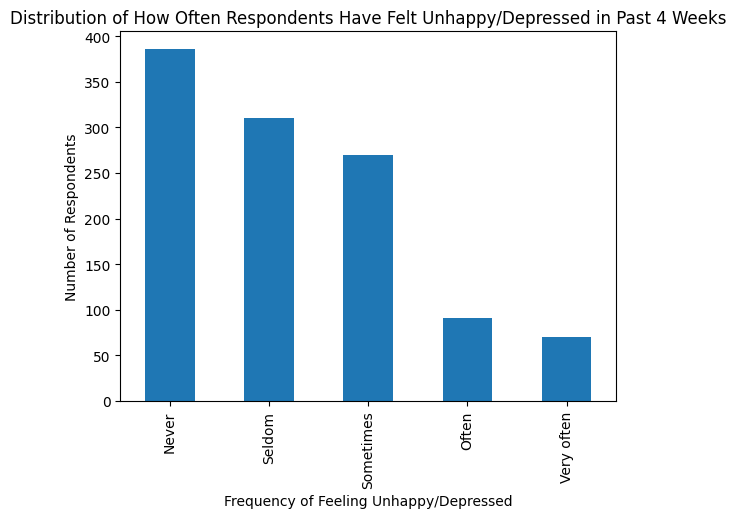

In [ ]:
category_order = ['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']
df['hlthdep'].value_counts().loc[category_order].plot.bar()

plt.title('Distribution of How Often Respondents Have Felt Unhappy/Depressed in Past 4 Weeks')

plt.xlabel('Frequency of Feeling Unhappy/Depressed')
plt.ylabel('Number of Respondents')

plt.show()

The distribution of respondants' depession levels decreases as the level of depression gets higher. A majority of participants do not feel depressed responding that they either never, seldom, or sometimes feel unhappy in the past month. The data does not have any outliers.

### Interaction between the Variables
The next few plots display the relationship between the variables associated with socioeconomic status and mental health.

In all of the graphs, we found that socioeconomic index and occupational prestige provided similar trends with happiness levels and depression levels so we decided to describe the results of the two socioeconomic status variables together.

#### Happiness Level Graphs


[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Socioeconomic Index')]

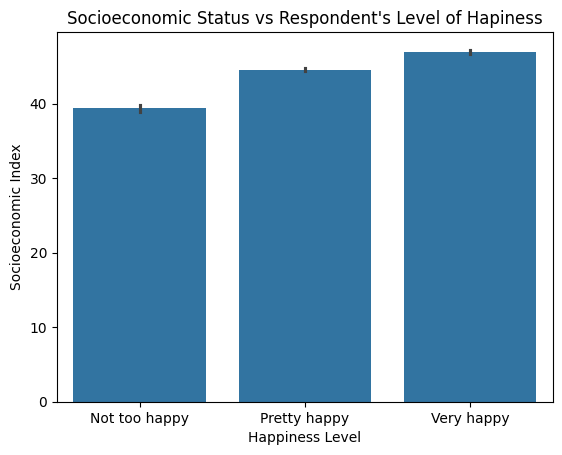

In [ ]:
sns.barplot(x='happy',y='sei10',data=df).set(title="Socioeconomic Index vs Respondent's Level of Happiness",xlabel='Happiness Level',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

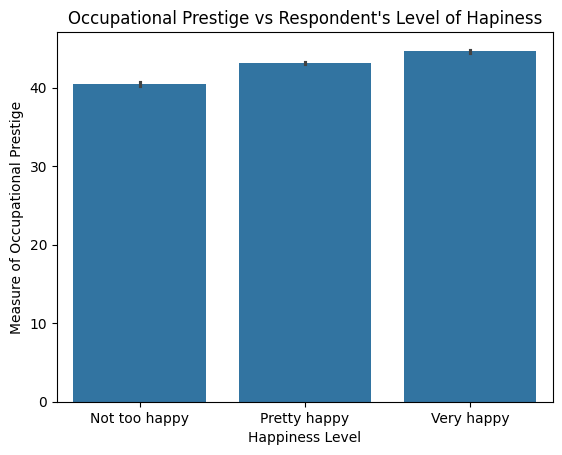

In [ ]:
sns.barplot(x='happy',y='prestg10',data=df).set(title="Occupational Prestige vs Respondent's Level of Happiness",xlabel='Happiness Level',ylabel='Measure of Occupational Prestige')

The bar graphs for both socioeconomic index and occupational prestige level of happiness, we observe that higher happiness levels correspond with higher socioeconomic status. Both socioeconomic status and occupational prestige shared similar values, with those who responded with “not too happy” having a mean index and prestige value of around 40. Meanwhile, those who responded “pretty happy” and “very happy” had a mean index of around 45 and 48 and prestige value of around 44 and 46. Each category had low variance within the index and prestige value.

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Socioeconomic Index')]

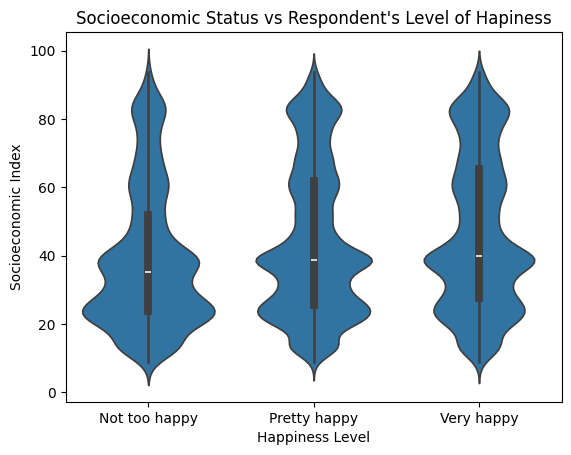

In [ ]:
sns.violinplot(x='happy',y='sei10',data=df).set(title="Socioeconomic Index vs Respondent's Level of Happiness",xlabel='Happiness Level',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Level of Hapiness"),
 Text(0.5, 0, 'Happiness Level'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

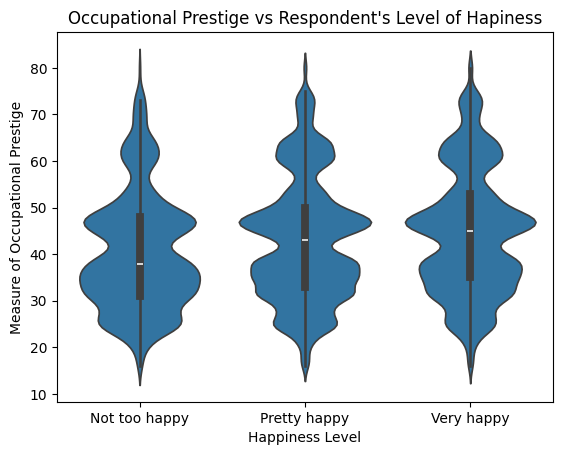

In [ ]:
sns.violinplot(x='happy',y='prestg10',data=df).set(title="Occupational Prestige vs Respondent's Level of Happiness",xlabel='Happiness Level',ylabel='Measure of Occupational Prestige')

In the violin plots, the "not too happy" category, the plots are more right skewed, with the density being congregated more towards lower socioeconomic index or occupational prestige. Meanwhile, the “pretty happy” and “very happy” categories were relatively more consistent, having a more even shape without as much skew. The “pretty happy” category, however, is still more skewed to lower index values compared to the “very happy” category.

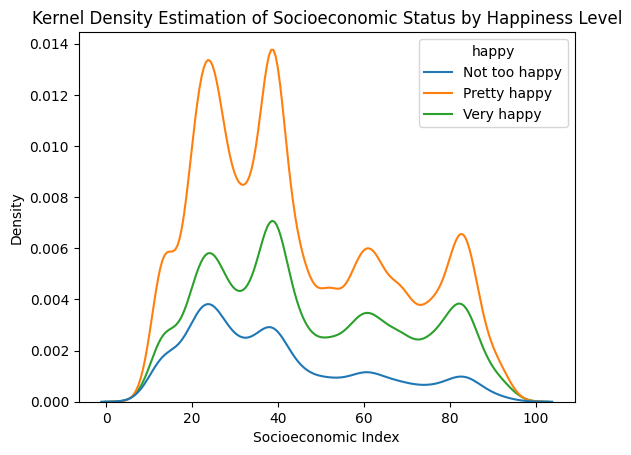

In [ ]:
sns.kdeplot(x='sei10', data=df, hue="happy").set(xlabel='Socioeconomic Index')

plt.title('Kernel Density Estimation of Socioeconomic Index by Happiness Level', wrap=True)

plt.show()

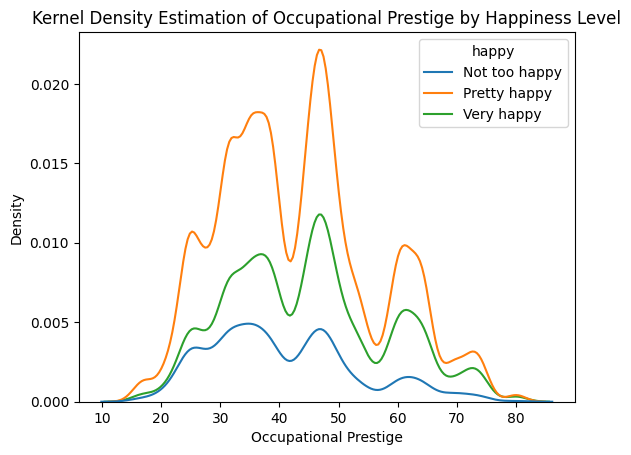

In [ ]:
sns.kdeplot(x='prestg10', data=df, hue="happy").set(xlabel='Occupational Prestige')

plt.title('Kernel Density Estimation of Occupational Prestige by Happiness Level', wrap=True)

plt.show()

Throughout the entirety of both kernel density plots, “pretty happy” was the highest category, “very happy” was the next most frequent category, and “not too happy” was the lowest. This is consistent with the distribution data of happiness levels between all participants.

#### Depression Level Graphs

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Socioeconomic Index')]

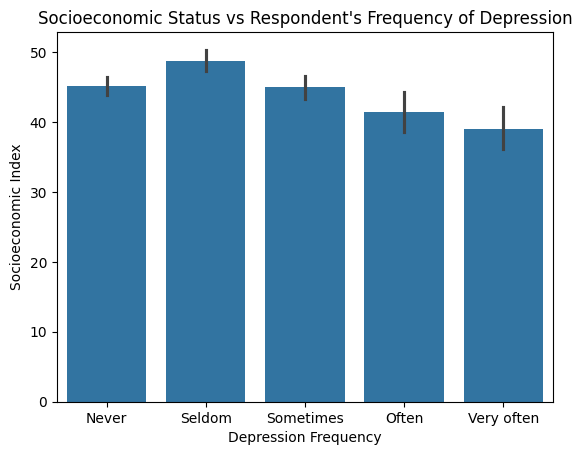

In [ ]:
sns.barplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Socioeconomic Index vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

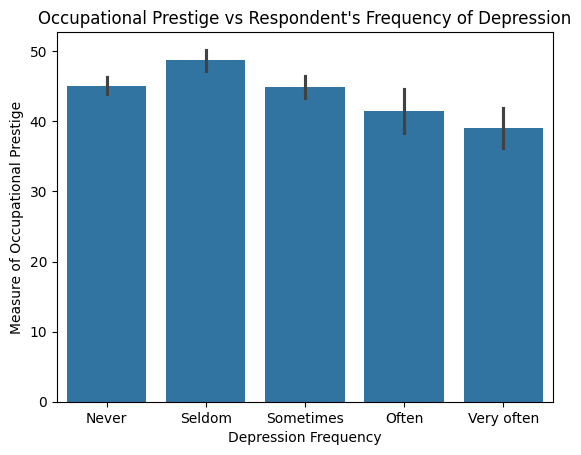

In [ ]:
sns.barplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Occupational Prestige vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Measure of Occupational Prestige')

From both bar graphs, the lower the depression level, the higher the associated socioeconomic status level with exception of the never thinking thoughts of depression category. Once again, both socioeconomic status and occupational prestige bar graphs shared similar values. The “seldom” category had a mean socioeconomic index and occupational prestige value of around 48. Next, the “never” and “sometimes” category had a mean index and prestige value around 45. The “often” and “very often” category had the lowest mean index and prestige value at around 40, and 38 respectively. The two highest depression level categories also had the largest variance in index and prestige value, meanwhile the three lowest depression level categories had lower variance.

[Text(0.5, 1.0, "Socioeconomic Status vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Socioeconomic Index')]

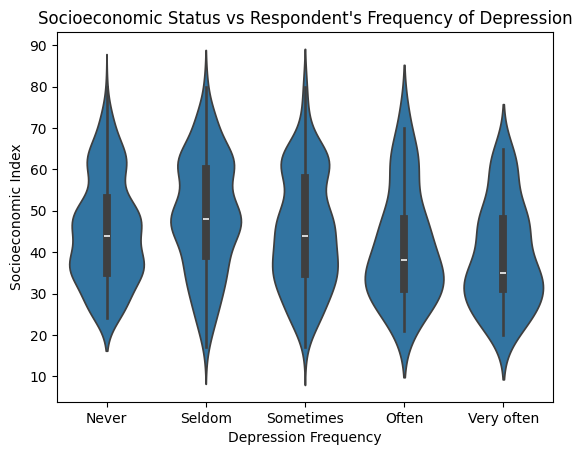

In [ ]:
sns.violinplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Socioeconomic Index vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Socioeconomic Index')

[Text(0.5, 1.0, "Occupational Prestige vs Respondent's Frequency of Depression"),
 Text(0.5, 0, 'Depression Frequency'),
 Text(0, 0.5, 'Measure of Occupational Prestige')]

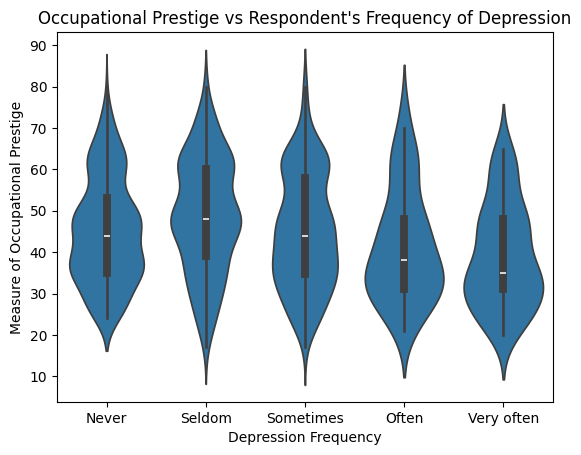

In [ ]:
sns.violinplot(x='hlthdep',y='prestg10',data=df, order=['Never', 'Seldom', 'Sometimes', 'Often', 'Very often']).set(title="Occupational Prestige vs Respondent's Frequency of Depression",xlabel='Depression Frequency',ylabel='Measure of Occupational Prestige')

The violin plots show that seldom and sometimes having depressive thoughts categories had the most consistent, even plot with socioeconomic status. The “never” category also had a most consistent plot, however, there is a slight skew where the density is higher at lower socioeconomic values. The “often” and “very often” categories have a stronger skew where lower socioeconomic values have a larger density. However, compared to “never”, “seldom”, and “sometimes”, the two higher depression levels had a larger density on the highest end of the socioeconomic scale around socioeconomic index and occupational prestige value of 70 and higher.

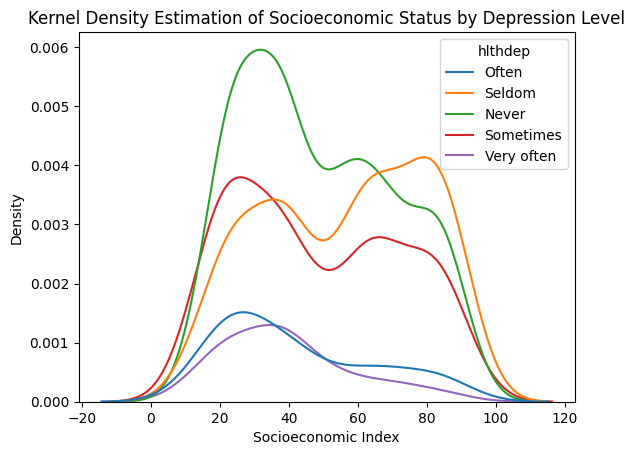

In [ ]:
sns.kdeplot(x='sei10', data=df, hue="hlthdep").set(xlabel='Socioeconomic Index')

plt.title('Kernel Density Estimation of Socioeconomic Index by Depression Level', wrap=True)

plt.show()

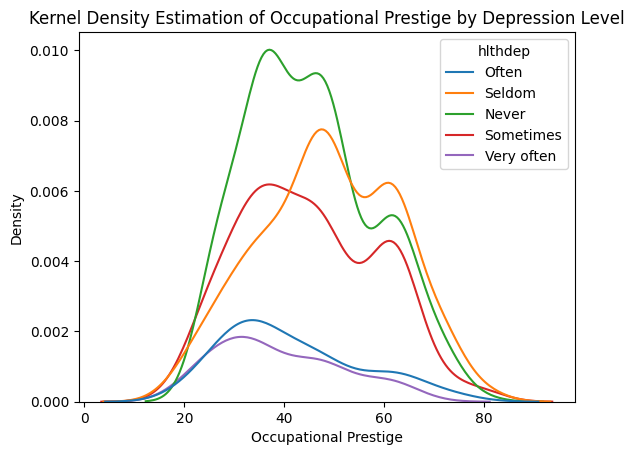

In [ ]:
sns.kdeplot(x='prestg10', data=df, hue="hlthdep").set(xlabel='Occupational Prestige')

plt.title('Kernel Density Estimation of Occupational Prestige by Depression Level', wrap=True)

plt.show()

In the kernel density plots, there are a few crossover points. The lowest socioeconomic status, where socioeconomic index is below 5 and occupational prestige is below 17, sometimes having depressive thoughts is the highest category followed by “seldom”, “never”, “often”, and “very often” respectively in the socioeconomic index graph. The occupational prestige graph is almost the same, however, the order of the categories are “sometimes”, “seldom”, “often”, “very often”, and “never”.

As socioeconomic status increases in value, when socioeconomic index is between 15 - 60 and occupational prestige is between 20 - 53, never having depressive thoughts becomes the most common category. The lower end of the middle class status, between index 15 - 35 and 20 - 40 prestige value, has “sometimes” as the next highest followed by “seldom”, “often”, and “very often”. The upper end of the middle class status has a similar standing, however “seldom” becomes more frequent than “sometimes” having depressive thoughts.

However, once we switch to high socioeconomic status, when socioeconomic index is between 60 - 110 and occupational prestige is between 53 - 85, seldom having depressive thoughts becomes more frequent than never having depressive thoughts. Those with the highest economic status with a socioeconomic index higher than 110 and an occupational prestige value higher than 85, “seldom” is still the highest, however sometimes having depressive thoughts overtakes never having depressive thoughts as the second highest frequency.

## Analysis
We found that socioeconomic index and occupational prestige tended to correlate positively with increased happiness. This is evident through the bar graphs where we saw the mean index increase as happiness went up as well as the violin plots where the lower happiness levels skewed more towards those with lower socioeconomic status. This implies that participants with a lower socioeconomic index or occupational prestige correlates with unhappiness. We believe this may likely be due to increased worries of financial concerns and dissatisfaction with their socioeconomic situation. We believe that individuals with a middle to high socioeconomic index or occupational prestige would need to worry less about financial troubles and other external factors that would impact their happiness, leading to the more even distribution in the "pretty happy" category.

The frequency of depressive feelings generally tended to increase as socioeconomic status decreased. When looking at the box plots and violin plots, for the most part, as socioeconomic index or occupational prestige increases, there are less people that experience common depressive feelings, but more people with mild depressive feelings. However, a sizable number of respondents with lower to middle socioeconomic status did not have depressing thoughts recently, as shown with the relatively lower mean status value in the boxplot, the slight skew towards lower socioeconomic status in the violin plot, and most the kernel density plots.

At the extremes of socioeconomic status, depression seems to increase. When looking at people with the highest socioeconomic indices and occupational prestige, we found that frequency of depression actually began to increase. This behavior is displayed in the kernel density plots for levels of depression where at higher indices, respondents that report sometimes having depressing feelings are greater than the people that report never. It is also shown in the violin plots where the density for having depressive thoughts often and very often were higher for those in the highest socioeconomic status. This may be due to some high prestige jobs naturally being intense or in a highly stressful environment. Even those who have high socioeconomic status have slightly more depressive thoughts than those with middle socioeconomic status as shown with the kernel density plot where having seldom depressive thoughts becomes more common than never having depressive thoughts. This trend also may be due to having more stress in their jobs but not reaching the stress of the highest prestige jobs. When looking at the lowest percentiles of socioeconomic index, we can observe that the majority of people report sometimes having depressive thoughts. We believe this may be due to these people having financial troubles or dissatisfaction with their socioeconomic situations.

## Conclusion
Overall, we found that the individuals with a higher socioeconomic status tended to have a greater level of happiness and better mental health. This result seems very reasonable as the people with more wealth and status in the U.S. are more likely to be able to have more material comforts and a high quality standard of living. Most likely, many of the people with less socioeconomic status are more likely to have financial worries. Additionally, those who have higher status may likely have more resources to help improve their mental health or address any problems they are having with mental health.

In anticipation of potential criticism, we would like to emphasize that our conclusion is not that people need to have a high socioeconomic status to have good mental health nor is it that people with low socioeconomic status have poor mental health. Our research only identifies a correlative trend and provides no substantive proof of a causal relationship.

Furthermore, a design choice we feel the need to justify was the level of happiness. The fact that happiness was measured as a self reported classification may not seem rigorous, however happiness as a concept is subjective and there would be no accurate way to universally quantify it. In fact, any attempt to objectively measure happiness would likely provide less value than self reporting as happiness for an individual should be most accurately determined by that individual. Additionally, we feel that only measuring happiness in three categories is sufficient as adding more would complicate things. More striations would have more ambiguity between the levels and may accidentally measure central or extreme tendency bias.

For further study we believe it would be best to investigate some more varied measures of socioeconomic status. Some possible options include individual income, household income, level of education, home or other asset value. It is likely that many of these variables would be strongly correlated so this may not provide any new significant information. Although there may be an interesting trend between people of high socioeconomic status that spend more compared to spend less.

In the future, we believe it would also be advisable to use a more varied measure of mental health. This may include diagnoses for various mental health conditions such as anxiety, personality disorders, and others.